# Info
Name: Nik Faiz Afiq bin Nik Ab Rahman<br>
Student ID: 17217542<br>
Course: WQD7006 Machine Learnig, Universiti Malaya

# Objective
1. Predict the coronavirus trend
2. Listing the country that have worried trend( upward trend) and also countries that are doing well

# Preprocessing to do list
1. Merge all the data from the 3 table
2. Unpivot the table so all the date and data is in 1 column
3. Change the date format
4. Fill the NaN value with 0 or remove it


# Exploratory Analysis
1. Add cummulative cases, cummulative recovered and cummulative death
2. Some analysis might need to be done to achieve objective 2 - list the country that have upward trend and have downward trend
    - Some idea: https://stackoverflow.com/questions/24134894/identify-graph-uptrend-or-downtrend
    - Other idea: find gradient of last 7 days and see if it is positive or negative


# Modeling
1. Use the model to predict the number of new cases (X- date, Y-number of new cases)

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


# Initial data import

In [522]:
root_folder = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

confirmed_df = pd.read_csv(root_folder+"time_series_covid19_confirmed_global.csv")
death_df = pd.read_csv(root_folder+"time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv(root_folder+"time_series_covid19_recovered_global.csv")



In [523]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568


In [524]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2117,2126,2139,2149,2160,2174,2179,2181,2191,2191
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1117,1125,1134,1143,1153,1164,1170,1174,1181,1181
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2696,2705,2716,2722,2728,2737,2745,2751,2756,2762
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,82,83,83,83,83,83,84,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,393,393,396,399,399,403,403,405,405,405


In [525]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39692,40359,40444,40784,41096,41441,41543,41612,41727,41727
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,29799,30276,30790,31181,31565,32122,32700,33185,33634,33634
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,64401,64777,65144,65505,65862,66214,66550,66855,67127,67395
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7106,7171,7203,7252,7288,7318,7360,7384,7432,7463
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,9729,9729,9921,9976,10354,10354,10627,10859,11044,11146


# Preprocessing

1. Unpivot and merge all 3 data

In [526]:
confirmed_melt = pd.melt(confirmed_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = confirmed_df.columns[4:],
                         var_name = "Date",value_name = 'Confirmed')
death_melt = pd.melt(death_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = death_df.columns[4:],
                         var_name = "Date",value_name = 'Death')
recovered_melt = pd.melt(recovered_df, id_vars = ['Province/State', 'Country/Region','Lat','Long'],
                         value_vars = recovered_df.columns[4:],
                         var_name = "Date",value_name = 'Recovered')

confirmed_melt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


2. Merging

In [527]:
merged1 = pd.merge(left = confirmed_melt ,right  = death_melt,how= "outer",
                  on = ['Province/State', 'Country/Region','Date','Lat','Long'])
merged_df = pd.merge(left = merged1 ,right  = recovered_melt,how= "outer",
                  on = ['Province/State', 'Country/Region','Date','Lat','Long'])
print(merged_df.shape)
merged_df.head()

(95842, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0.0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0.0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0.0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0.0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0.0,0.0,0.0


3. handling missing data

In [528]:
# percentage of missing data
merged_df.isnull().sum()/merged_df.shape[0]

Province/State    0.693141
Country/Region    0.000000
Lat               0.003610
Long              0.003610
Date              0.000000
Confirmed         0.021661
Death             0.021661
Recovered         0.075812
dtype: float64

In [529]:
# missing value of recovered with 0
merged_df['Recovered'] = merged_df['Recovered'].fillna(0)  

# change the values to integer
merged_df['Recovered'] = merged_df['Recovered'].astype('int') 

# missing value of province/state with ' '
merged_df['Province/State'] = merged_df['Recovered'].fillna(' ')

# Add active column
merged_df['Active'] = merged_df['Confirmed']-merged_df['Death'] - merged_df['Recovered'] 

In [530]:
merged_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
95837,367,China,37.8957,114.9042,1/1/21,NaN,NaN,367,NaN
95838,1270,China,33.8820,113.6140,1/1/21,NaN,NaN,1270,NaN
95839,16680,Mozambique,-18.6657,35.5296,1/1/21,NaN,NaN,16680,NaN
95840,5420,Syria,34.8021,38.9968,1/1/21,NaN,NaN,5420,NaN
95841,32,Timor-Leste,-8.8742,125.7275,1/1/21,NaN,NaN,32,NaN


3. Convert date types

In [531]:
print(merged_df['Date'].describe())

merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.normalize()

print(merged_df['Date'].describe(datetime_is_numeric=True))
merged_df['Date']

count      95842
unique       346
top       9/1/20
freq         277
Name: Date, dtype: object
count                            95842
mean     2020-07-12 12:00:00.000011008
min                2020-01-22 00:00:00
25%                2020-04-17 00:00:00
50%                2020-07-12 12:00:00
75%                2020-10-07 00:00:00
max                2021-01-01 00:00:00
Name: Date, dtype: object


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
95837   2021-01-01
95838   2021-01-01
95839   2021-01-01
95840   2021-01-01
95841   2021-01-01
Name: Date, Length: 95842, dtype: datetime64[ns]

4. Save file to csv

In [532]:
merged_df.to_csv('data/covid19_cleaned.csv',index=False)

In [533]:
print(merged_df.shape)
merged_df.head()

(95842, 9)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0,0.0
1,0,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0,0.0
2,0,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0,0.0
3,0,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0,0.0
4,0,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0,0.0


#### New Cases column

In [534]:
# grouped the data based on the country
new = merged_df.groupby(['Date','Country/Region'])['Confirmed','Death','Recovered','Active'].sum().reset_index()
print(new.shape)
new.head()

(66086, 6)


<ipython-input-534-cbcc3bf0d952>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new = merged_df.groupby(['Date','Country/Region'])['Confirmed','Death','Recovered','Active'].sum().reset_index()


,Date,Country/Region,Confirmed,Death,Recovered,Active
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0
1,2020-01-22,Albania,0.0,0.0,0,0.0
2,2020-01-22,Algeria,0.0,0.0,0,0.0
3,2020-01-22,Andorra,0.0,0.0,0,0.0
4,2020-01-22,Angola,0.0,0.0,0,0.0


Creating new columns dataframe and merged it

In [535]:
new_col = merged_df.groupby(['Country/Region','Date'])['Confirmed','Death','Recovered'].sum().diff().reset_index()

new_col.columns = ['Country/Region', 'Date', 'New Confirmed', 'New Death', 'New Recovered']

# fix first row of the countries
first_rows = (new_col['Country/Region'] != new_col["Country/Region"].shift(1))
new_col.loc[first_rows,'New Confirmed'] = 0
new_col.loc[first_rows,'New Death'] = 0
new_col.loc[first_rows,'New Recovered'] = 0

print(new.head())
print(new_col.head())


# Merge the new values
df = pd.merge(new,new_col,on=['Country/Region','Date'], how = 'left')
df.head()

        Date Country/Region  Confirmed  Death  Recovered  Active
0 2020-01-22    Afghanistan        0.0    0.0          0     0.0
1 2020-01-22        Albania        0.0    0.0          0     0.0
2 2020-01-22        Algeria        0.0    0.0          0     0.0
3 2020-01-22        Andorra        0.0    0.0          0     0.0
4 2020-01-22         Angola        0.0    0.0          0     0.0

<ipython-input-535-2c6ecae3e656>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_col = merged_df.groupby(['Country/Region','Date'])['Confirmed','Death','Recovered'].sum().diff().reset_index()



  Country/Region       Date  New Confirmed  New Death  New Recovered
0    Afghanistan 2020-01-22            0.0        0.0            0.0
1    Afghanistan 2020-01-23            0.0        0.0            0.0
2    Afghanistan 2020-01-24            0.0        0.0            0.0
3    Afghanistan 2020-01-25            0.0        0.0            0.0
4    Afghanistan 2020-01-26            0.0        0.0            0.0


,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0.0,0.0,0.0


In [536]:
# Fix datatype for new column
df[ ['New Confirmed', 'New Death', 'New Recovered']] = df[ ['New Confirmed', 'New Death', 'New Recovered']].astype('int')


In [537]:
df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0,0.0,0,0,0
1,2020-01-22,Albania,0.0,0.0,0,0.0,0,0,0
2,2020-01-22,Algeria,0.0,0.0,0,0.0,0,0,0
3,2020-01-22,Andorra,0.0,0.0,0,0.0,0,0,0
4,2020-01-22,Angola,0.0,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
66081,2021-01-01,Vietnam,1474.0,35.0,1325,114.0,9,0,0
66082,2021-01-01,West Bank and Gaza,139223.0,1418.0,118926,18879.0,1219,18,1743
66083,2021-01-01,Yemen,2101.0,610.0,1396,95.0,2,0,2
66084,2021-01-01,Zambia,20997.0,390.0,18773,1834.0,272,2,113


Export data to csv

In [538]:
df.to_csv('data/covid19_df.csv',index=False)

In [539]:
# NA check
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Death             0
Recovered         0
Active            0
New Confirmed     0
New Death         0
New Recovered     0
dtype: int64

## Latest date

In [540]:
# latest date df
latest_df = df[df["Date"] == df["Date"].max()]
latest_df.reset_index(drop= True,inplace=True)
latest_df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727,7608.0,0,0,0
1,2021-01-01,Albania,58316.0,1181.0,33634,23501.0,0,0,0
2,2021-01-01,Algeria,99897.0,2762.0,67395,29740.0,287,6,268
3,2021-01-01,Andorra,8117.0,84.0,7463,570.0,68,0,31
4,2021-01-01,Angola,17568.0,405.0,11146,6017.0,15,0,102
...,...,...,...,...,...,...,...,...,...
186,2021-01-01,Vietnam,1474.0,35.0,1325,114.0,9,0,0
187,2021-01-01,West Bank and Gaza,139223.0,1418.0,118926,18879.0,1219,18,1743
188,2021-01-01,Yemen,2101.0,610.0,1396,95.0,2,0,2
189,2021-01-01,Zambia,20997.0,390.0,18773,1834.0,272,2,113


## World Data

In [550]:
world_df = df.groupby(['Date']).sum().astype('int').reset_index()
world_df

,Date,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,555,17,28,510,0,0,0
1,2020-01-23,654,18,30,606,99,1,2
2,2020-01-24,941,26,36,879,287,8,6
3,2020-01-25,1434,42,39,1353,493,16,3
4,2020-01-26,2118,56,52,2010,684,14,13
...,...,...,...,...,...,...,...,...
341,2020-12-28,81285853,1774390,45994197,34013505,488731,9435,296123
342,2020-12-29,81951541,1789915,46348935,34318991,665688,15525,354738
343,2020-12-30,82708280,1805008,46731540,34685515,756739,15093,382605
344,2020-12-31,83424446,1818116,47010049,35113601,716166,13108,278509


## Statistics

In [551]:
# table for top 10 countries
latest_df.sort_values('Confirmed',ascending = False).head(10)

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
177,2021-01-01,US,20128693.0,347788.0,0,19780905.0,160606,2051,0
79,2021-01-01,India,10286709.0,148994.0,9883461,254254.0,20035,256,23181
23,2021-01-01,Brazil,7700578.0,195411.0,6855372,649795.0,24605,462,6528
141,2021-01-01,Russia,3153960.0,56798.0,2553467,543695.0,26613,527,25745
62,2021-01-01,France,2697014.0,64892.0,200822,2431300.0,19348,133,680
181,2021-01-01,United Kingdom,2549689.0,74237.0,5679,2469773.0,53458,615,200
176,2021-01-01,Turkey,2220855.0,21093.0,2114760,85002.0,12203,212,14110
85,2021-01-01,Italy,2129376.0,74621.0,1479988,574767.0,22210,462,16877
161,2021-01-01,Spain,1928265.0,50837.0,150376,1727052.0,0,0,0
66,2021-01-01,Germany,1762637.0,34145.0,1388744,339748.0,2117,354,38036


# EDA

Trend for new cases within the last 7 days. <br>
need to standardize first so that the gradient is in the same unit<br>
Increasing, stays the same, or decreasing

In [541]:
weekly_df = df[df["Date"] > (df["Date"].max()-pd.offsets.Day(7))]
weekly_df.reset_index(drop= True,inplace=True)
weekly_df

,Date,Country/Region,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-12-26,Afghanistan,50886.0,2149.0,40784,7953.0,76,10,340
1,2020-12-26,Albania,55755.0,1143.0,31181,23431.0,375,9,391
2,2020-12-26,Algeria,97857.0,2722.0,65505,29630.0,416,6,361
3,2020-12-26,Andorra,7806.0,83.0,7252,471.0,50,0,49
4,2020-12-26,Angola,17149.0,399.0,9976,6774.0,50,3,55
...,...,...,...,...,...,...,...,...,...
1332,2021-01-01,Vietnam,1474.0,35.0,1325,114.0,9,0,0
1333,2021-01-01,West Bank and Gaza,139223.0,1418.0,118926,18879.0,1219,18,1743
1334,2021-01-01,Yemen,2101.0,610.0,1396,95.0,2,0,2
1335,2021-01-01,Zambia,20997.0,390.0,18773,1834.0,272,2,113


In [542]:
# Standardizing the value before calculating the gradient
# 
# devide by max value then times 10 (x value will be between 0 and 10)
# so gradient value standardized based on the max value

def gradient_find(x):
    return np.polyfit(range(len(x)), x/max(x)*10, 1)[0]

def corr_find(x):
    return np.corrcoef(range(len(x)), x)[0,1]

In [639]:
weekly = weekly_df.groupby(['Country/Region'])['New Confirmed'].apply(gradient_find).reset_index()
weekly.rename(columns={"New Confirmed": "gradient"},inplace=True)

weekly['Status'] = ["increasing" if x>0.2  else "decreasing" if x<-0.2 else "around the same" for x in weekly ['gradient'] ]
weekly


,Country/Region,gradient,Status
0,Afghanistan,-0.708358,decreasing
1,Albania,-0.413534,decreasing
2,Algeria,-0.542582,decreasing
3,Andorra,0.871849,increasing
4,Angola,-0.122024,around the same
...,...,...,...
186,Vietnam,1.142857,increasing
187,West Bank and Gaza,-0.011759,around the same
188,Yemen,0.892857,increasing
189,Zambia,1.117794,increasing


In [640]:
weekly.isna().sum()

Country/Region     0
gradient          14
Status             0
dtype: int64

inspect why Null on that country
- 0 data

In [641]:
weekly = weekly.dropna()

In [642]:
weekly = weekly.sort_values("gradient",ascending=True).reset_index(drop=True)
weekly

,Country/Region,gradient,Status
0,Tajikistan,-1.775210,decreasing
1,New Zealand,-0.982143,decreasing
2,Azerbaijan,-0.914841,decreasing
3,Mongolia,-0.833333,decreasing
4,Ghana,-0.726044,decreasing
...,...,...,...
172,Sierra Leone,1.530612,increasing
173,Portugal,1.557765,increasing
174,Guyana,1.567460,increasing
175,Singapore,1.571429,increasing


In [670]:
weekly['Status'].value_counts()

increasing         105
around the same     49
decreasing          23
Name: Status, dtype: int64

<AxesSubplot:>

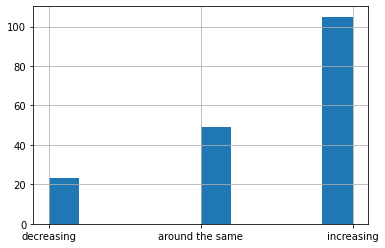

In [671]:
weekly['Status'].hist()

In [676]:
weekly_inc = weekly[weekly["Status"] == "increasing"].sort_values("gradient",ascending=False)
weekly_inc.head(10)

,Country/Region,gradient,Status
176,Malawi,1.763393,increasing
175,Singapore,1.571429,increasing
174,Guyana,1.567460,increasing
173,Portugal,1.557765,increasing
172,Sierra Leone,1.530612,increasing
171,Czechia,1.523019,increasing
170,Slovenia,1.434585,increasing
169,Slovakia,1.420993,increasing
168,Cabo Verde,1.398176,increasing
167,Hungary,1.275064,increasing


In [677]:
weekly_dec = weekly[weekly["Status"] == "decreasing"].sort_values("gradient",ascending=True)
weekly_dec.head(10)

,Country/Region,gradient,Status
0,Tajikistan,-1.775210,decreasing
1,New Zealand,-0.982143,decreasing
2,Azerbaijan,-0.914841,decreasing
3,Mongolia,-0.833333,decreasing
4,Ghana,-0.726044,decreasing
5,Madagascar,-0.714286,decreasing
6,Saint Kitts and Nevis,-0.714286,decreasing
7,Afghanistan,-0.708358,decreasing
8,Congo (Brazzaville),-0.649640,decreasing
9,Haiti,-0.558350,decreasing


In [678]:
weekly_dec = weekly[weekly["Status"] == "around the same"].sort_values("gradient",ascending=False)
weekly_dec.head(10)

,Country/Region,gradient,Status
71,Tunisia,0.180643,around the same
70,Switzerland,0.145838,around the same
69,Uzbekistan,0.143443,around the same
68,Montenegro,0.137481,around the same
67,Burkina Faso,0.125833,around the same
66,Saint Lucia,0.123626,around the same
65,Costa Rica,0.123299,around the same
64,Kosovo,0.120710,around the same
63,Germany,0.107884,around the same
62,Jamaica,0.101461,around the same


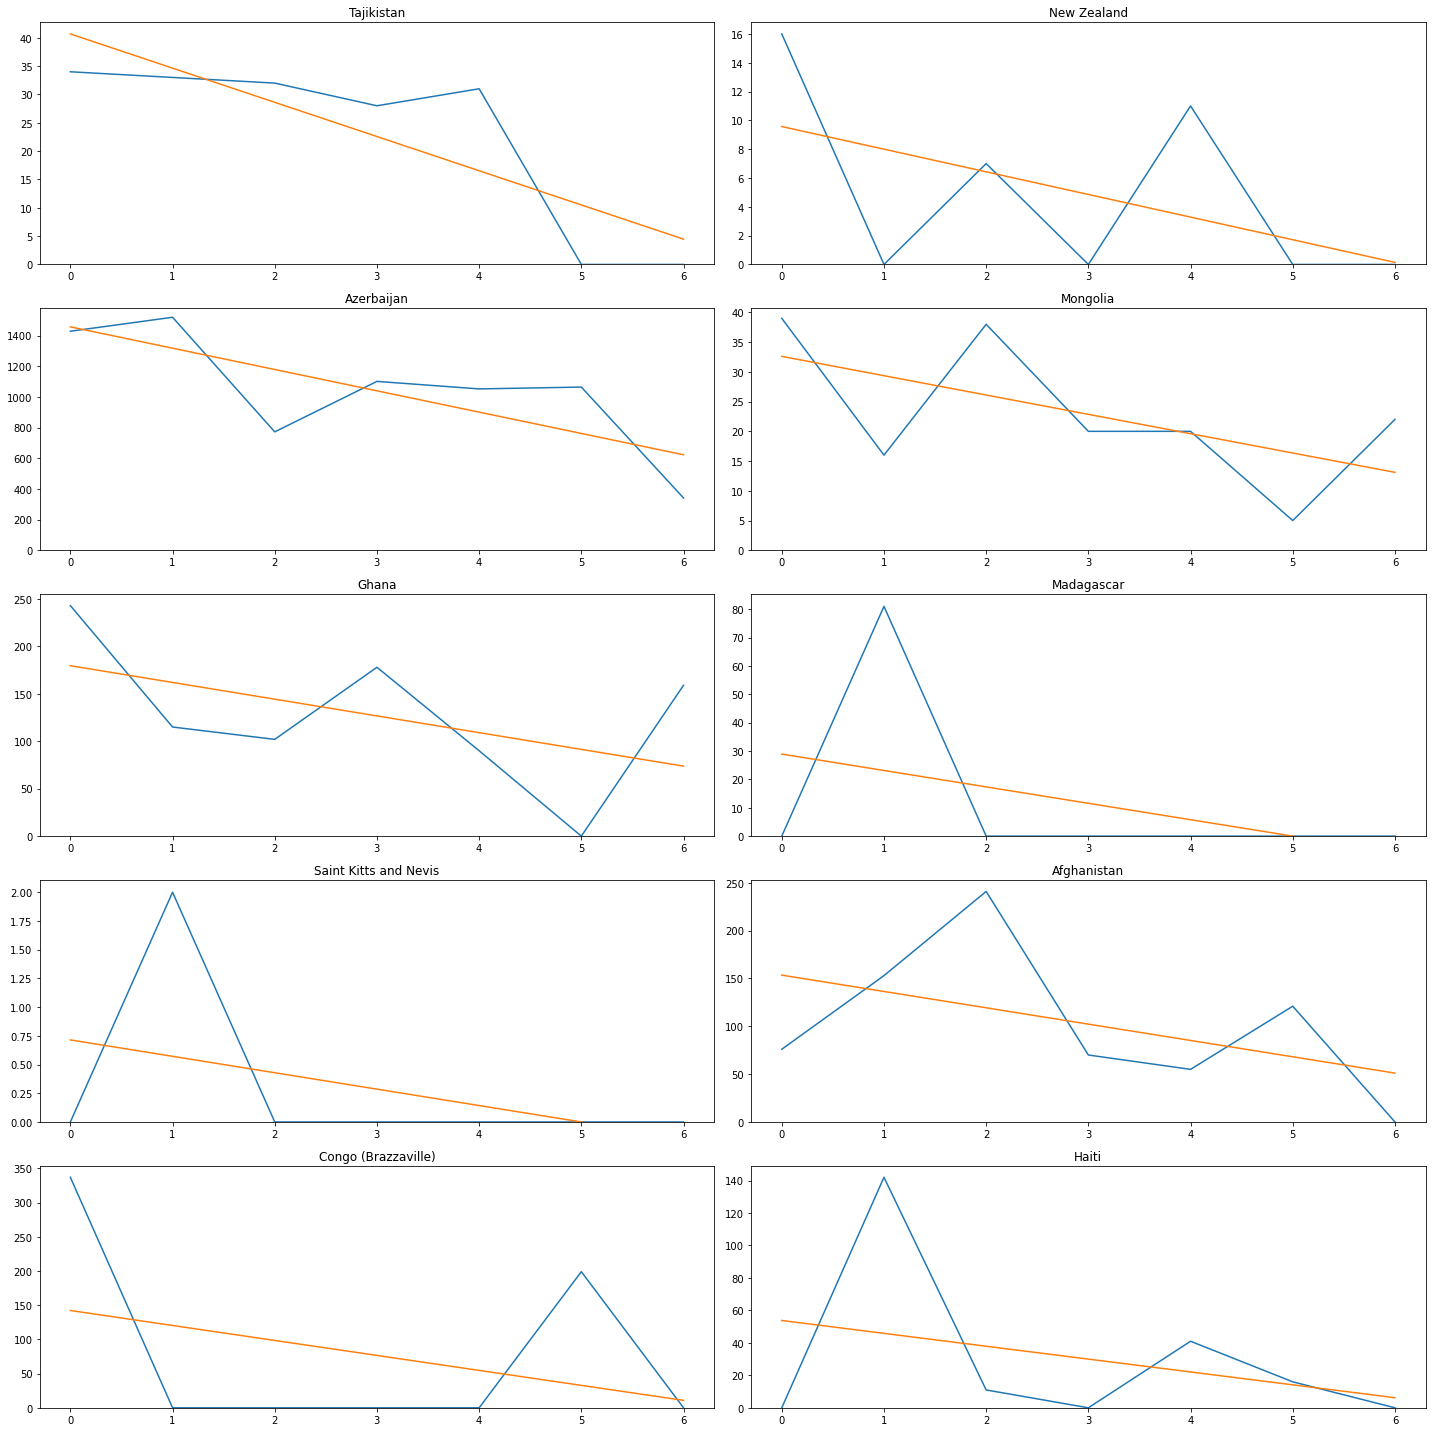

In [668]:
# Top 10 countries with decreasing new cases in last 7 days
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
for i in range(10):
    country = weekly['Country/Region'][i]
    d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']
    m, b = np.polyfit(range(len(d)), d, 1)
    ax[i].plot(range(len(d)),d)
    ax[i].plot(range(len(d)), m*range(len(d)) + b)
    ax[i].set_title(country)
    ax[i].axis(ymin=0)

fig.tight_layout()
plt.show()

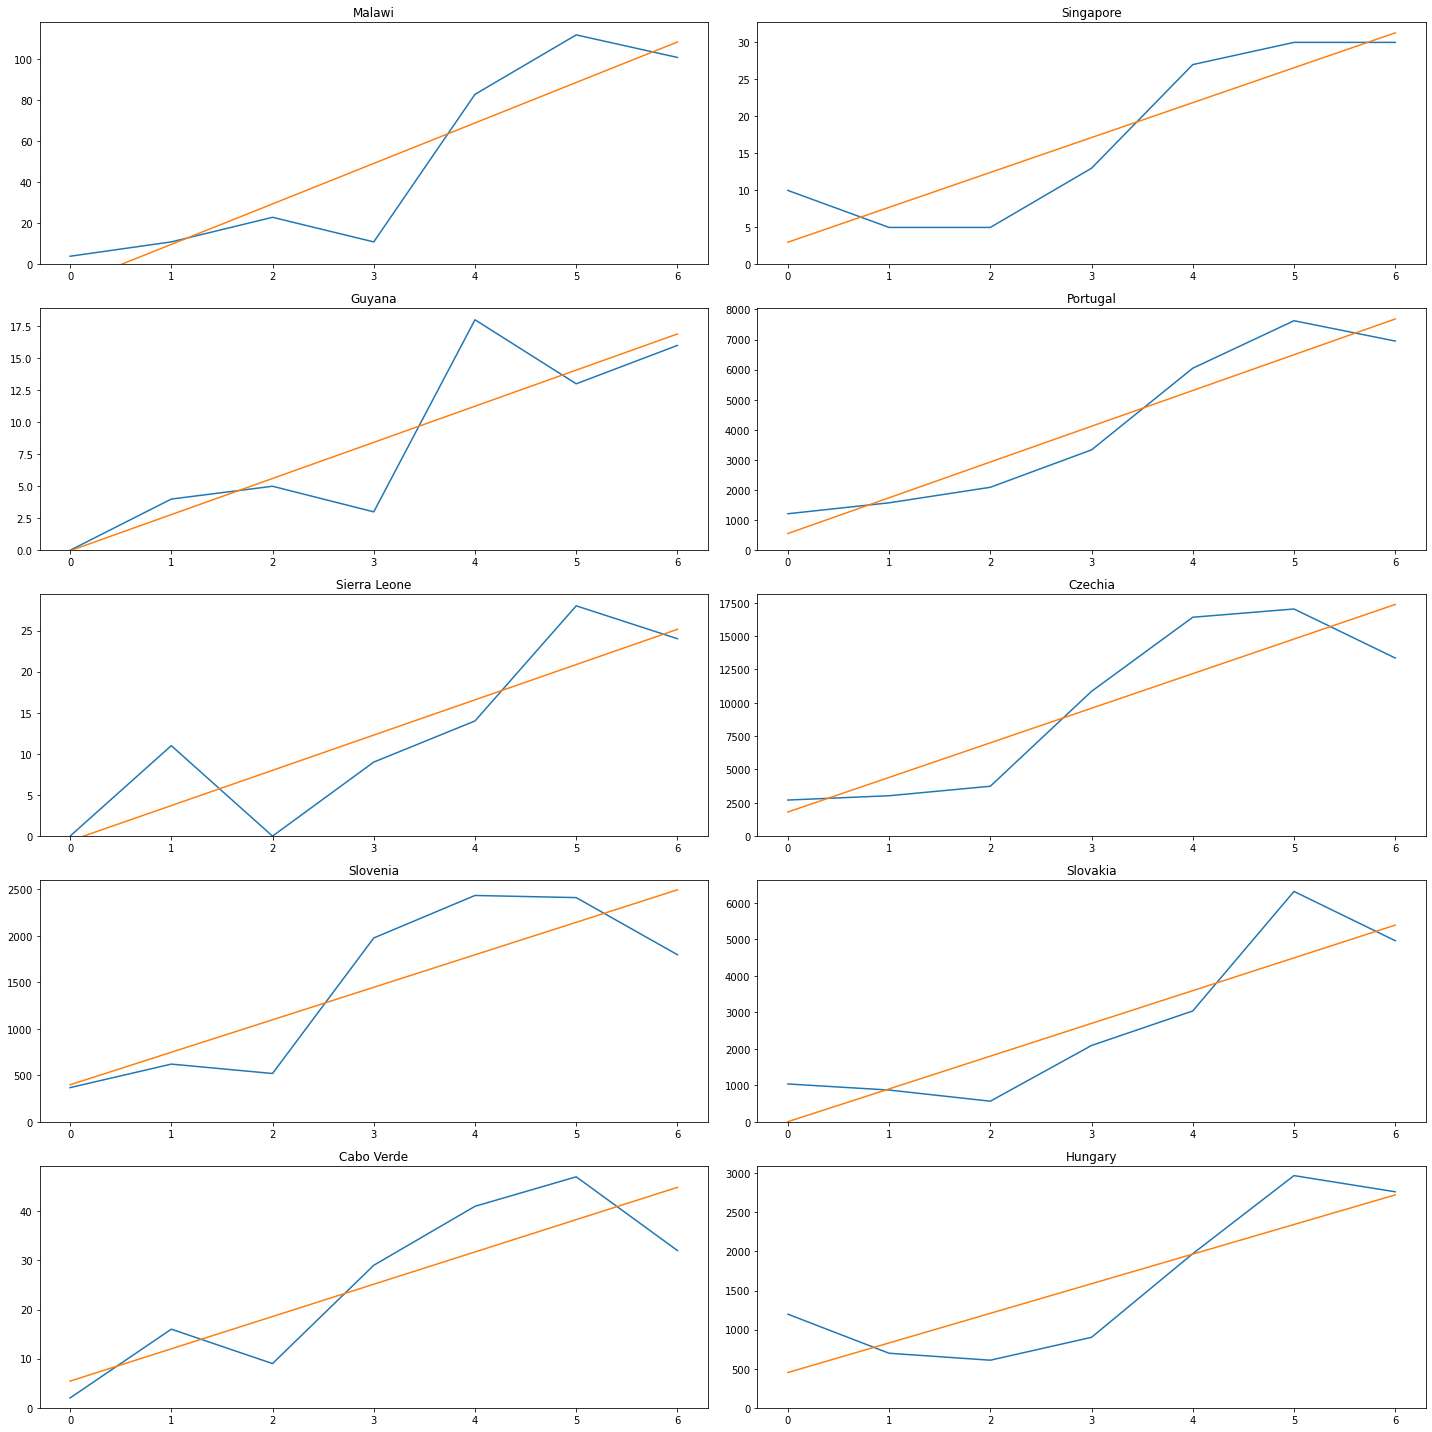

In [669]:
# Bottom 10 countries with increasing new cases within last 7 days
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
for i in range(10):
    country = weekly['Country/Region'].iloc[-(i+1)]
    d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']
    m, b = np.polyfit(range(len(d)), d, 1)
    ax[i].plot(range(len(d)),d)
    ax[i].plot(range(len(d)), m*range(len(d)) + b)
    ax[i].set_title(country)
    ax[i].axis(ymin=0)

fig.tight_layout()
plt.show()

real coef: 2.999999999999998
real gradient: 4.714285714285714


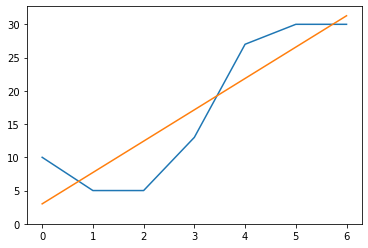

In [679]:
country = 'Singapore'
d = weekly_df[weekly_df['Country/Region'] == country]['New Confirmed']

m, b = np.polyfit(range(len(d)), d, 1)

print("real coef:",b)
print("real gradient:",m)

#fig = plt.figure(figsize=(13,8))
plt.plot(range(len(d)),d)
plt.plot(range(len(d)), m*range(len(d)) + b)
plt.ylim(0) 
plt.show()

In [688]:
print(list(weekly['Country/Region'][:5]))
print(list(weekly['Country/Region'][-5:]))

['Tajikistan', 'New Zealand', 'Azerbaijan', 'Mongolia', 'Ghana']
['Sierra Leone', 'Portugal', 'Guyana', 'Singapore', 'Malawi']


top 10 new cases trend countries:
- 'Tajikistan', 'New Zealand', 'Azerbaijan', 'Mongolia', 'Ghana'

worst 10 new cases trend countries:
- 'Sierra Leone', 'Portugal', 'Guyana', 'Singapore', 'Malawi'

most countries still have increasing covid-19 cases within last 7 days- which is worrying.

## World COVID-19 cases


In [552]:
world_df

,Date,Confirmed,Death,Recovered,Active,New Confirmed,New Death,New Recovered
0,2020-01-22,555,17,28,510,0,0,0
1,2020-01-23,654,18,30,606,99,1,2
2,2020-01-24,941,26,36,879,287,8,6
3,2020-01-25,1434,42,39,1353,493,16,3
4,2020-01-26,2118,56,52,2010,684,14,13
...,...,...,...,...,...,...,...,...
341,2020-12-28,81285853,1774390,45994197,34013505,488731,9435,296123
342,2020-12-29,81951541,1789915,46348935,34318991,665688,15525,354738
343,2020-12-30,82708280,1805008,46731540,34685515,756739,15093,382605
344,2020-12-31,83424446,1818116,47010049,35113601,716166,13108,278509


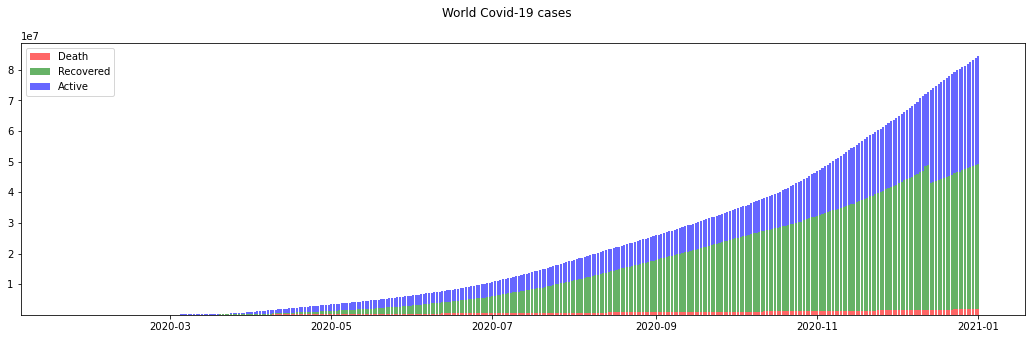

In [553]:
fig = plt.figure(figsize=(18,5))
plt.suptitle('World Covid-19 cases')
# fig, ax = plt.subplots()

plt.bar(world_df['Date'],world_df['Death'].values,color = 'red',alpha=0.6,label='Death')
plt.bar(world_df['Date'],world_df['Recovered'].values,color = 'green',alpha=0.6,label='Recovered',
       bottom = world_df['Death'])
plt.bar(world_df['Date'],world_df['Active'].values,color = 'blue',alpha=0.6,label='Active',
       bottom = world_df['Death']+world_df['Recovered'])


plt.legend(loc='upper left')
plt.show()

# Modeling

Predict how many new cases in the next 20 days

In [583]:
# train-split test

X = world_df['Date'].values.reshape(-1, 1)
X = np.array(range(len(world_df['Date']))).reshape(-1,1)


y = world_df['New Confirmed']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42 ,train_size = 0.7)
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [584]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(242, 1)
(104, 1)
(242,)
(104,)


In [602]:
#Creting X for forecasting 20days into the future
Xforecast = np.array(range(int(max(X)),int(max(X))+20)).reshape(-1,1)

# Initializing score table 
score = pd.DataFrame(columns = ["Model","MAE","RMSE",'R2 Score'])

# Initializing prediction table
pred_list  = pd.DataFrame()
pred_list.insert(0,"date",pd.Series(pd.date_range("2021-01-01", periods=20, freq="D")))

In [603]:
# dir(score)
# score.insert()

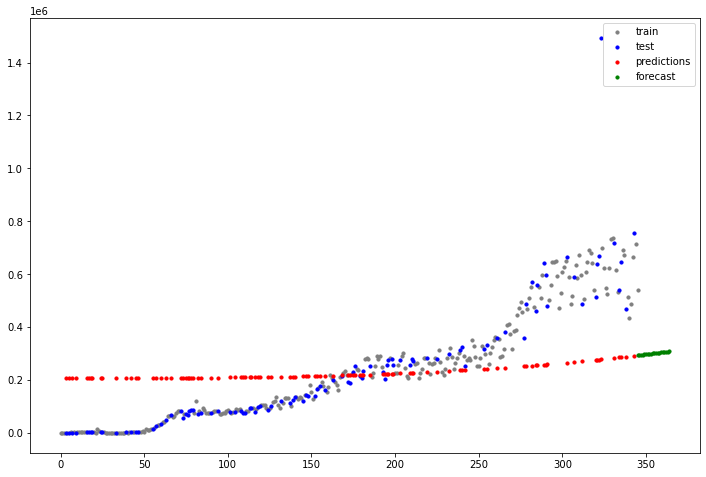

In [604]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# svr = SVR(kernel='poly')
svr = SVR(kernel='poly')
svr.fit(Xtrain,ytrain)
ypred = svr.predict(Xtest)
yforecast = svr.predict(Xforecast)


from contextlib import suppress

with suppress(Exception):
    score = score.append({
        "Model":'Support Vector Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    
    pred_list.insert(1,"Support Vector Regression",yforecast)



plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


                       Model        MAE       RMSE  R2 Score
0  Support Vector Regression  153465.23  212185.66    -79.23
1          Linear Regression   57733.72  113281.84      0.63


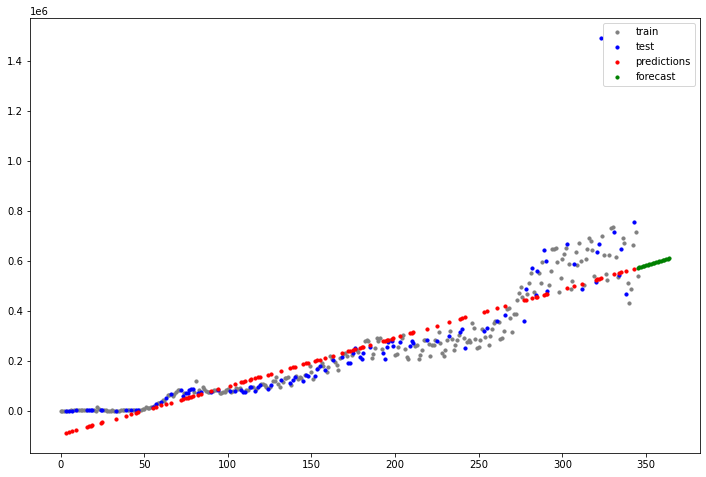

In [605]:
# Simple Linear regression

from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(Xtrain,ytrain)
ypred = lin_reg.predict(Xtest)
yforecast = lin_reg.predict(Xforecast)

with suppress(Exception):
    score = score.append({
        "Model":'Linear Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    pred_list.insert(2,"Linear Regression",yforecast)
    
print(score)


plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


                       Model        MAE       RMSE  R2 Score
0  Support Vector Regression  153465.23  212185.66    -79.23
1          Linear Regression   57733.72  113281.84      0.63
2      Polynomial Regression   38426.31   98694.73      0.74


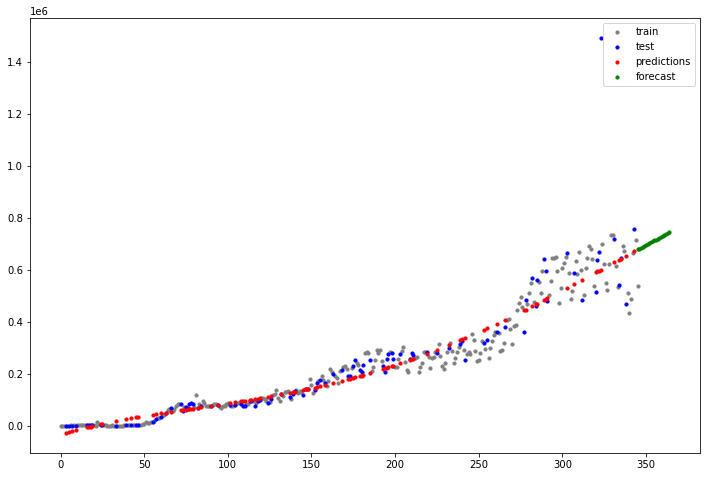

In [606]:
# polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4)

poly_Xtrain = poly_features.fit_transform(Xtrain) 
poly_Xtest = poly_features.fit_transform(Xtest)
poly_Xforecast = poly_features.fit_transform(Xforecast)

poly_reg = LinearRegression()
poly_reg.fit(poly_Xtrain,ytrain)
ypred = poly_reg.predict(poly_Xtest)
yforecast = poly_reg.predict(poly_Xforecast)

with suppress(Exception):
    score = score.append({
        "Model":'Polynomial Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    
    pred_list.insert(3,"Polynomial Regression",yforecast)

print(score)


plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()


                       Model        MAE       RMSE  R2 Score
0  Support Vector Regression  153465.23  212185.66    -79.23
1          Linear Regression   57733.72  113281.84      0.63
2      Polynomial Regression   38426.31   98694.73      0.74
3   Random Forest Regression   27765.94   88563.77      0.80


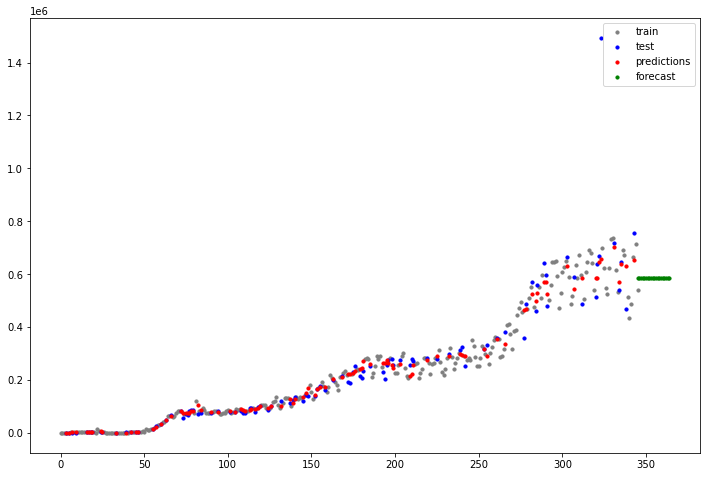

In [607]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(Xtrain,ytrain)
ypred = rf_reg.predict(Xtest)
yforecast = rf_reg.predict(Xforecast)


with suppress(Exception):
    score = score.append({
        "Model":'Random Forest Regression',
        "MAE": round(metrics.mean_absolute_error(ypred,ytest),2),
        "RMSE": round(metrics.mean_squared_error(ytest,ypred,squared=False),2),
        "R2 Score": round(metrics.r2_score(ypred,ytest),2)
    },ignore_index = True)
    
    pred_list.insert(4,"Random Forest Regression",yforecast)

print(score)

plt.figure(figsize=(12,8))
plt.plot()
plt.scatter(Xtrain,ytrain,label = 'train',c = 'grey',s=10)
plt.scatter(Xtest,ytest,label = 'test',color ='blue',s=10)
plt.scatter(Xtest,ypred,label = 'predictions',color = 'red',s=10)
plt.scatter(Xforecast,yforecast,label = 'forecast',color = 'green',s=10)
plt.legend()

In [608]:
pred_list

,date,Support Vector Regression,Linear Regression,Polynomial Regression,Random Forest Regression
0,2021-01-01,293769.498314,573394.249184,679161.313883,584946.85
1,2021-01-02,294518.709167,575331.296168,682657.208883,584946.85
2,2021-01-03,295272.263259,577268.343151,686148.507415,584946.85
3,2021-01-04,296030.173144,579205.390135,689634.921303,584946.85
4,2021-01-05,296792.451372,581142.437118,693116.160339,584946.85
5,2021-01-06,297559.110499,583079.484102,696591.932281,584946.85
6,2021-01-07,298330.163075,585016.531085,700061.942853,584946.85
7,2021-01-08,299105.621654,586953.578069,703525.895747,584946.85
8,2021-01-09,299885.498788,588890.625052,706983.492622,584946.85
9,2021-01-10,300669.807031,590827.672036,710434.433104,584946.85


In [592]:
score

,Model,MAE,RMSE,R2 Score
0,Support Vector Regression,153465.23,212185.66,-79.23
1,Linear Regression,57733.72,113281.84,0.63
2,Polynomial Regression,38426.31,98694.73,0.74
3,Random Forest Regression,27609.96,87480.81,0.81
